In [1]:
import pandas as pd
import seaborn as sns

In [2]:
trade_matrix = pd.read_csv('data/import_export.csv')

In [3]:
trade_matrix2 = trade_matrix.drop(columns=['Element Code', "Domain", "Domain Code", "Year", "Flag", "Reporter Country Code (M49)"])
trade_matrix2.head()

,Reporter Countries,Partner Country Code (M49),Partner Countries,Element,Item Code (CPC),Item,Year Code,Unit,Value,Flag Description
0,Switzerland,4,Afghanistan,Import quantity,23161.02,"Rice, milled",2023,t,50.00,Official figure
1,Switzerland,4,Afghanistan,Import quantity,F0030,"Rice, paddy (rice milled equivalent)",2023,t,50.00,Estimated value
2,Switzerland,8,Albania,Import quantity,23161.02,"Rice, milled",2016,t,2.32,Official figure
3,Switzerland,8,Albania,Export quantity,23161.02,"Rice, milled",2005,t,0.00,Official figure
4,Switzerland,8,Albania,Import quantity,F0030,"Rice, paddy (rice milled equivalent)",2016,t,2.32,Estimated value


In [4]:
tm = trade_matrix.groupby(["Partner Countries", "Element"])["Value"].mean().reset_index()
tm

,Partner Countries,Element,Value
0,Afghanistan,Import quantity,50.000000
1,Albania,Export quantity,0.000000
2,Albania,Import quantity,2.320000
3,Algeria,Export quantity,0.000000
4,Algeria,Import quantity,0.270000
...,...,...,...
235,Venezuela (Bolivarian Republic of),Import quantity,0.000000
236,Viet Nam,Export quantity,0.000000
237,Viet Nam,Import quantity,486.567255
238,Yugoslav SFR,Import quantity,5471.714286


In [5]:
reduced_TM = tm.loc[tm["Value"]>=2000]
reduced_TM.shape

(19, 3)

<Axes: xlabel='Partner Countries', ylabel='Value'>

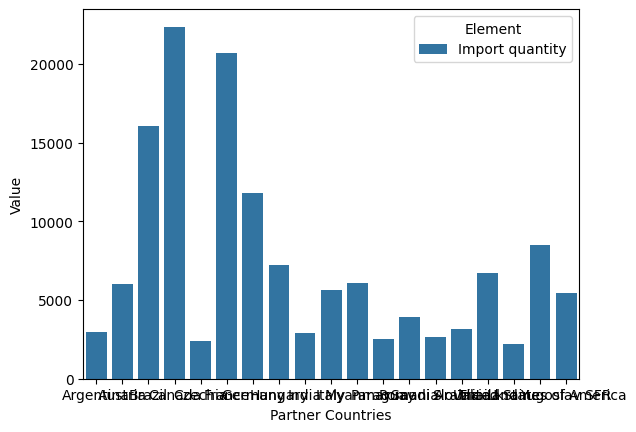

In [6]:
sns.barplot(x="Partner Countries", y="Value", hue="Element", data=reduced_TM)

Description of exports of switerland  count    112.000000
mean       8.895965
std       25.781179
min        0.000000
25%        0.000000
50%        1.000000
75%        5.102888
max      198.219400
Name: Value, dtype: float64
Total exports in tones 996.3480852591038


<Axes: xlabel='Value', ylabel='Count'>

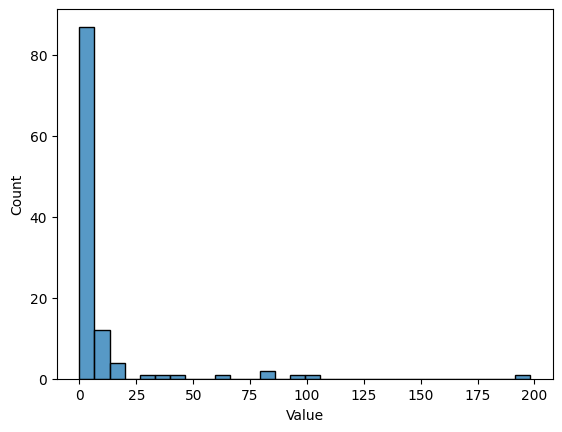

In [18]:
export = tm.loc[tm["Element"]== "Export quantity"]
print("Description of exports of switerland ",export["Value"].describe())
print("Total exports in tones",export["Value"].sum())
sns.histplot(export["Value"], bins=30)

Description of imports of switerland  count      128.000000
mean      1204.973559
std       3462.581468
min          0.000000
25%          0.748148
50%         23.156528
75%        338.654331
max      22365.545203
Name: Value, dtype: float64
Total imports in tones 154236.6155737898


<Axes: xlabel='Value', ylabel='Count'>

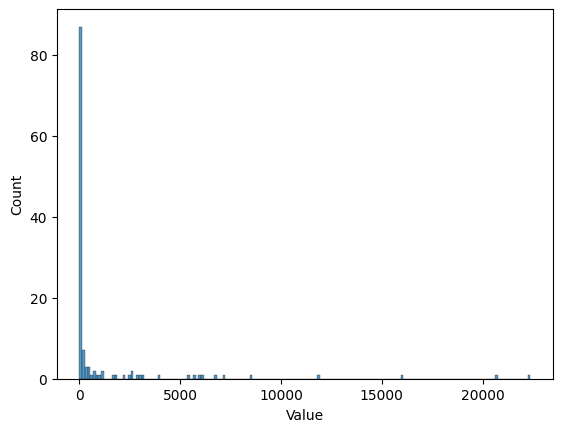

In [17]:
imports = tm.loc[tm["Element"]== "Import quantity"]
print("Description of imports of switerland ",imports["Value"].describe())
print("Total imports in tones",imports["Value"].sum())
sns.histplot(imports["Value"])